<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Assignment Questions </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement



### About the data set (Rainfall Prediction data)

The dataset contains information about rainfall predictions. The aim is to find whether rainfall will occur or not based on the several parameters of the atmospheric conditions and profile. <br> Attribute information: 

**Date:** Dates on which rainfall occurred or not 

**Location:** Location where we want to classify rainfall occurrence.

**MinTemp:** Minimum temperature in that particular date

**MaxTemp:** Maximum temperature in that particular date

**Rainfall:** Rainfall occurrence level in cm

**Evaporation:** Evaporation value

**Sunshine:** Sunshine level in m

**WindGustDir:** Direction of wind

**WindGustSpeed:**  Wind Speed

**WindDir9am:** Wind direction at 9am

**WindDir3pm:** Wind direction at 3pm

**WindSpeed9am:** Wind speed at 9am

**WindSpeed3pm:** Wind speed at 3pm

**Humidity9am:** Humidity at 9am

**Humidity3pm:** Humidity at 3pm

**Pressure9am:** Pressure at 9am

**Pressure3pm:** Pressure at 9am

**Cloud9am:** Cloud Cover at 9am

**Cloud3pm:** Cloud Cover at 3pm

**Temp9am:** Temperature at 9am

**Temp3pm:** Temperature at 3pm

**RainToday:** Rain fall happened or not today

**RainTomorrow:** Does tomorrow rainfall will happen or not: Yes(1) or No(0)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.7 - **[Scale the Data](#scale)**
    - 2.8 - **[Train-Test Split](#split)**
3. **[Logistic Regression (Full Model)](#logit)**
    - 3.1 - **[Identify the Best Cut-off Value](#cut_off)**
        - 3.1.1 - **[Youden's Index](#youden)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [2]:
df=pd.read_csv("Rainfall_prediction_data.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-03-2012,Wollongong,16.0,20.4,8.2,NaN,NaN,S,63.0,SSW,...,69.0,92.0,1018.5,1017.6,1.0,8.0,17.4,15.6,Yes,Yes
1,06-01-2011,PerthAirport,18.5,25.9,16.0,5.4,11.8,WSW,39.0,SSW,...,60.0,36.0,1004.6,1003.6,7.0,1.0,22.2,25.1,Yes,No
2,29-06-2014,Penrith,8.7,16.5,0.0,NaN,NaN,WNW,56.0,WNW,...,41.0,41.0,NaN,NaN,NaN,NaN,13.1,15.1,No,No
3,16-12-2008,Cairns,25.5,33.9,0.2,5.0,7.0,SSE,41.0,SSE,...,64.0,59.0,1009.8,1007.4,6.0,5.0,30.8,31.5,No,No
4,21-04-2015,SalmonGums,3.8,23.0,0.0,NaN,NaN,N,28.0,NE,...,56.0,29.0,NaN,NaN,NaN,NaN,14.0,21.1,No,No


**Let us now see the number of variables and observations in the data.**

In [3]:
print("Number of Variables :", len(df.columns))
print("Number of Observations :", len(df))

Number of Variables : 23
Number of Observations : 1040


<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1040 non-null   object 
 1   Location       1040 non-null   object 
 2   MinTemp        1035 non-null   float64
 3   MaxTemp        1035 non-null   float64
 4   Rainfall       1029 non-null   float64
 5   Evaporation    582 non-null    float64
 6   Sunshine       533 non-null    float64
 7   WindGustDir    969 non-null    object 
 8   WindGustSpeed  969 non-null    float64
 9   WindDir9am     981 non-null    object 
 10  WindDir3pm     1014 non-null   object 
 11  WindSpeed9am   1032 non-null   float64
 12  WindSpeed3pm   1023 non-null   float64
 13  Humidity9am    1031 non-null   float64
 14  Humidity3pm    1016 non-null   float64
 15  Pressure9am    929 non-null    float64
 16  Pressure3pm    932 non-null    float64
 17  Cloud9am       613 non-null    float64
 18  Cloud3pm

#### Change the data type as per the data definition.

In [5]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

#### Recheck the data type after the conversion. 

In [6]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

<a id="drop"></a>
## 2.3 Remove Insignificant Variables, if its applicable.

In [7]:
cols_to_drop = ['Location', 'Date']
df = df.drop(cols_to_drop, axis=1)

# <a id="dist"></a>
## 2.4 Distribution of Variables

**Distribution of numeric independent variables.**

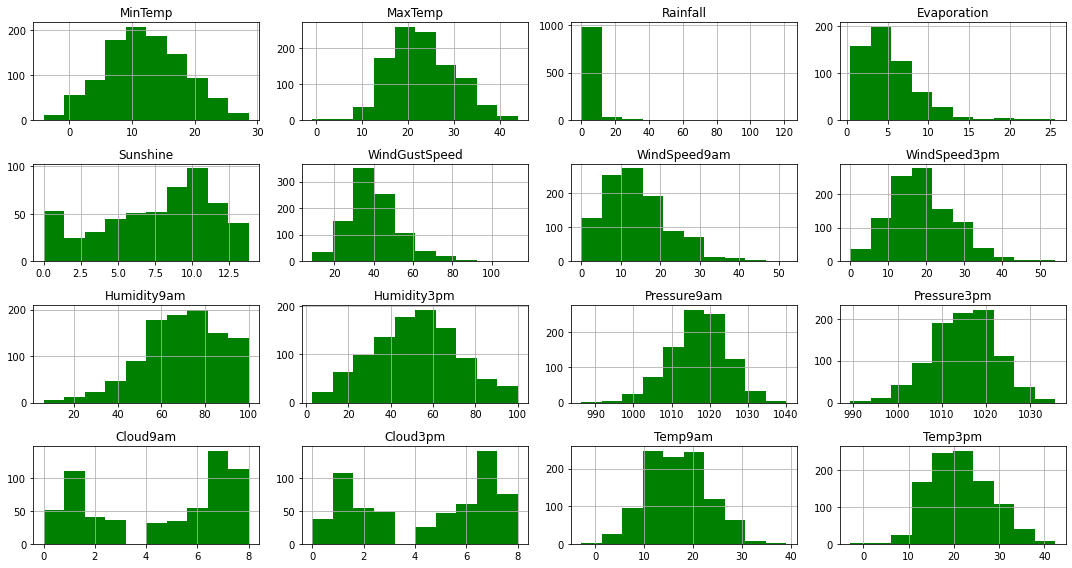

Skewness:
MinTemp          0.104990
MaxTemp          0.294201
Rainfall         8.499077
Evaporation      1.624399
Sunshine        -0.515384
WindGustSpeed    1.001696
WindSpeed9am     0.726155
WindSpeed3pm     0.494159
Humidity9am     -0.442775
Humidity3pm      0.031312
Pressure9am     -0.297925
Pressure3pm     -0.201687
Cloud9am        -0.296792
Cloud3pm        -0.217657
Temp9am          0.162631
Temp3pm          0.280177
dtype: float64
Skewness:

MinTemp         -0.055009
MaxTemp          0.035168
Rainfall         0.946003
Evaporation     -0.004149
Sunshine        -0.358847
WindGustSpeed    0.006287
WindSpeed9am    -0.038106
WindSpeed3pm     0.007318
Humidity9am     -0.095542
Humidity3pm     -0.077005
Pressure9am      0.004309
Pressure3pm     -0.000212
Cloud9am        -0.345565
Cloud3pm        -0.290687
Temp9am          0.013067
Temp3pm          0.076784
dtype: float64
       MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     0.656502 -0.351342  1.810998       

In [8]:
from sklearn.preprocessing import PowerTransformer
# select the numeric variables
df_num = df.select_dtypes(include=np.number)

# plot the histograms
df_num.hist(figsize=(15, 8), color='green')

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

# print the skewness for each numeric independent variable
print('Skewness:')
print(df_num.skew())

# separate the numeric variables
df_num = df.select_dtypes(include=['float64'])

# initialize the power transformer
pt = PowerTransformer(method='yeo-johnson')

# transform the data
df_num_transformed = pd.DataFrame(pt.fit_transform(df_num), columns=df_num.columns)

# print the skewness for each numeric independent variable
print('Skewness:')
print()
print(df_num_transformed.skew())
# replace the numeric columns in df_rain with the transformed columns
df[df_num.columns] = df_num_transformed
print(df_num_transformed)

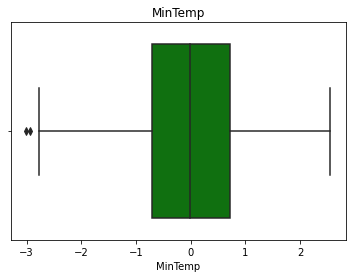

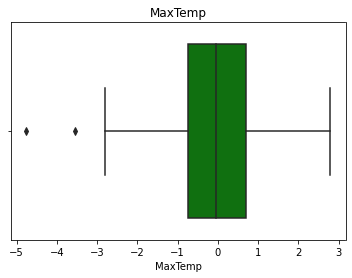

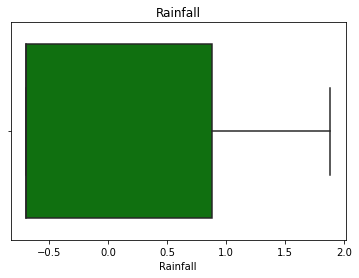

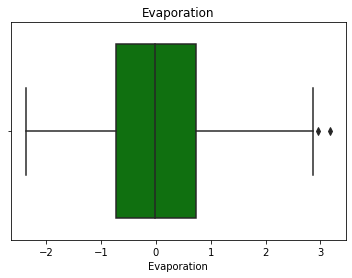

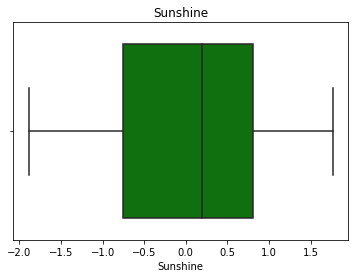

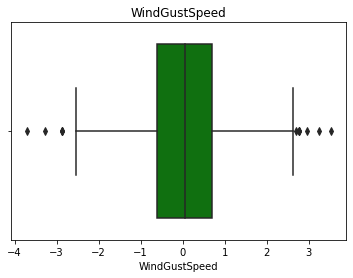

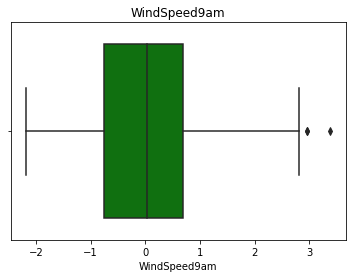

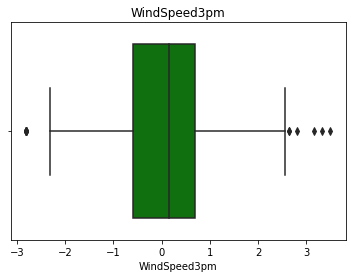

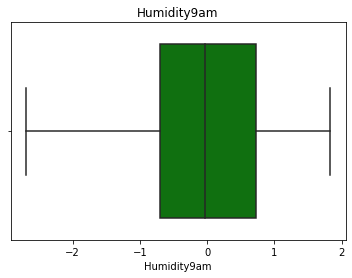

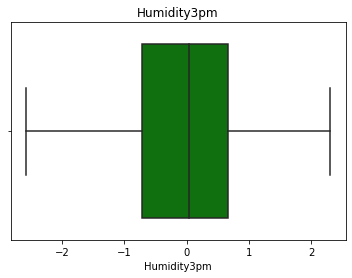

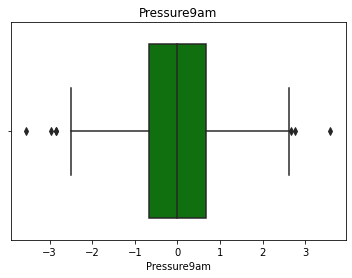

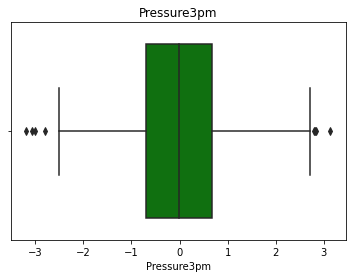

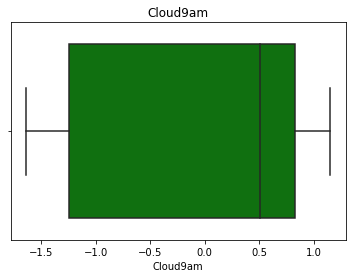

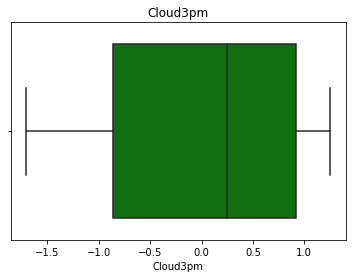

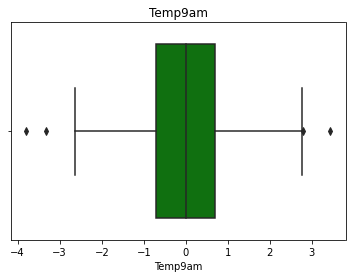

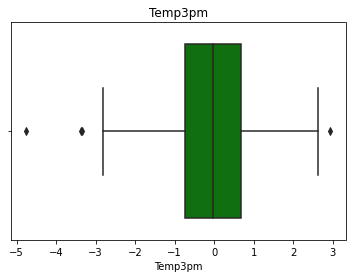

In [9]:
# select the numeric variables
df_num = df.select_dtypes(include=np.number)

# create a boxplot for each variable
for col in df_num.columns:
    plt.figure()
    sns.boxplot(x=df_num[col], color='green')
    plt.title(col)
    
# show the plots
plt.show()

In [10]:
# select the numeric variables
df_num = df.select_dtypes(include=np.number)

# calculate the IQR
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# remove outliers
df_out = df_num[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

# update the df_num dataframe with the outliers removed
df_num[df_out.columns] = df_out


# display the shape of the new dataframe
print('Shape of dataframe before removing outliers:', df_num.shape)
print('Shape of dataframe after removing outliers:', df_out.shape)

Shape of dataframe before removing outliers: (1040, 16)
Shape of dataframe after removing outliers: (996, 16)


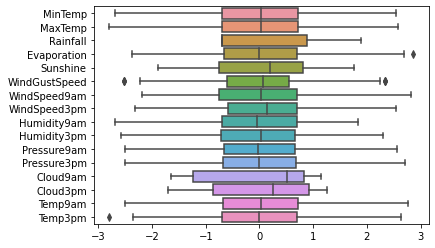

In [11]:
import seaborn as sns

# select the numeric variables
df_num = df.select_dtypes(include=np.number)

# create the box plot
sns.boxplot(data=df_out, orient='h')

# display the plot
plt.show()

**Distribution of categoric independent variable.**

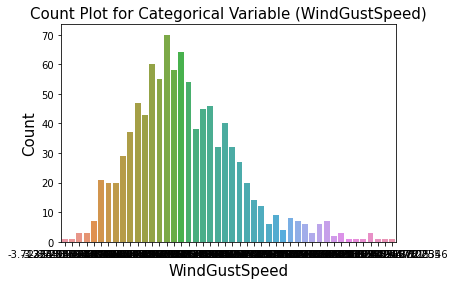

In [12]:
# plot the count plot
sns.countplot(data=df, x='WindGustSpeed')

# add plot and axes labels, set text size using 'fontsize'
plt.title('Count Plot for Categorical Variable (WindGustSpeed)', fontsize=15)
plt.xlabel('WindGustSpeed', fontsize=15)
plt.ylabel('Count', fontsize=15)

# display the plot
plt.show()

#### Distribution of dependent variable.

No     0.797115
Yes    0.202885
Name: RainTomorrow, dtype: float64


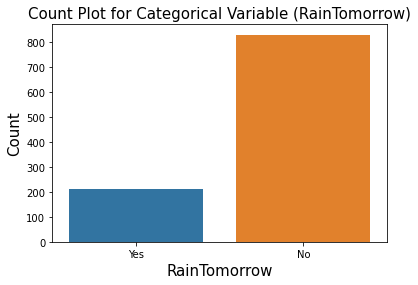

In [13]:
# print the distribution of RainTomorrow column as a percentage
print(df['RainTomorrow'].value_counts(normalize=True))

# plot a count plot for the RainTomorrow column
import seaborn as sns

sns.countplot(data=df, x='RainTomorrow')
plt.title('Count Plot for Categorical Variable (RainTomorrow)', fontsize = 15)
plt.xlabel('RainTomorrow', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

<a id="null"></a>
## 2.5 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [14]:
# count the total number of missing values for each column in the DataFrame
Total = df.isnull().sum().sort_values(ascending=False)

# calculate the percentage of missing values for each column in the DataFrame
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)

# concatenate the total and percentage of missing values into a single DataFrame
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])

# display the missing_data DataFrame
missing_data

,Total,Percentage of Missing Values
Sunshine,507,48.750000
Evaporation,458,44.038462
Cloud3pm,443,42.596154
Cloud9am,427,41.057692
Pressure9am,111,10.673077
Pressure3pm,108,10.384615
WindGustDir,71,6.826923
WindGustSpeed,71,6.826923
WindDir9am,59,5.673077
WindDir3pm,26,2.500000


In [15]:
df.isnull().sum()

MinTemp            5
MaxTemp            5
Rainfall          11
Evaporation      458
Sunshine         507
WindGustDir       71
WindGustSpeed     71
WindDir9am        59
WindDir3pm        26
WindSpeed9am       8
WindSpeed3pm      17
Humidity9am        9
Humidity3pm       24
Pressure9am      111
Pressure3pm      108
Cloud9am         427
Cloud3pm         443
Temp9am            6
Temp3pm           18
RainToday         11
RainTomorrow       0
dtype: int64

In [16]:
num_cols = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm','MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
cat_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday']

for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [17]:
Total = df.isnull().sum().sort_values(ascending=False)
Total

MinTemp          0
Humidity9am      0
RainToday        0
Temp3pm          0
Temp9am          0
Cloud3pm         0
Cloud9am         0
Pressure3pm      0
Pressure9am      0
Humidity3pm      0
WindSpeed3pm     0
MaxTemp          0
WindSpeed9am     0
WindDir3pm       0
WindDir9am       0
WindGustSpeed    0
WindGustDir      0
Sunshine         0
Evaporation      0
Rainfall         0
RainTomorrow     0
dtype: int64

In [18]:
#Copy the dataset to treat misisng values
df_rain= df.copy()
df_rain.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.656502,-0.351342,1.810998,2.756482e-16,-2.349590e-16,S,1.544685,SSW,SW,2.442634,...,-0.095994,1.934305,1.226448e-01,3.412276e-01,-1.241944e+00,1.252493e+00,0.123056,-0.872719,Yes,Yes
1,1.041761,0.451833,1.857185,3.039936e-01,1.159927e+00,WSW,0.059860,SSW,WSW,0.794926,...,-0.589850,-0.761588,-1.651764e+00,-1.524783e+00,8.309664e-01,-1.265987e+00,0.888287,0.563184,Yes,No
2,-0.507424,-0.958935,-0.694282,2.756482e-16,-2.349590e-16,WNW,1.168150,WNW,WNW,0.693755,...,-1.519058,-0.508746,-4.550241e-17,-7.427743e-16,-1.398193e-16,-1.584439e-16,-0.586004,-0.952249,No,No
3,2.095096,1.537136,-0.041217,1.826794e-01,-2.183917e-01,SSE,0.208773,SSE,SE,-0.208219,...,-0.374334,0.377551,-1.024127e+00,-1.041904e+00,5.054857e-01,2.427855e-01,2.208499,1.470187,No,No
4,-1.340833,0.035211,-0.694282,2.756482e-16,-2.349590e-16,N,-0.892648,NE,W,0.036051,...,-0.798771,-1.121876,-4.550241e-17,-7.427743e-16,-1.398193e-16,-1.584439e-16,-0.435408,-0.026011,No,No


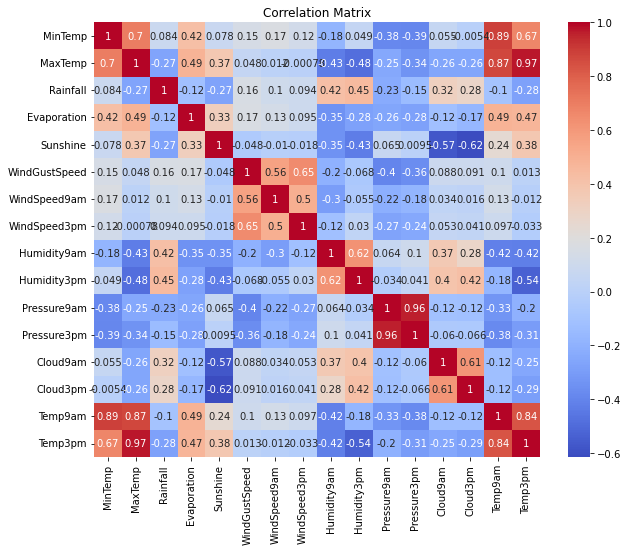

In [53]:
# assuming 'df' is your dataframe
corr = df_rain.corr()

# plot correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<a id="dummy"></a>
## 2.6 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [19]:
y=df_rain['RainTomorrow']
x=df_rain.drop('RainTomorrow', axis=1)

In [20]:
y.head()

0    Yes
1     No
2     No
3     No
4     No
Name: RainTomorrow, dtype: object

#### Filter numerical and categorical variables.

In [21]:
x_num=x.select_dtypes(include=np.number)
x_cat=x.select_dtypes(include=object)

In [22]:
x_num

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.656502,-0.351342,1.810998,2.756482e-16,-2.349590e-16,1.544685,2.442634,0.256337,-0.095994,1.934305,1.226448e-01,3.412276e-01,-1.241944e+00,1.252493e+00,0.123056,-0.872719
1,1.041761,0.451833,1.857185,3.039936e-01,1.159927e+00,0.059860,0.794926,0.479961,-0.589850,-0.761588,-1.651764e+00,-1.524783e+00,8.309664e-01,-1.265987e+00,0.888287,0.563184
2,-0.507424,-0.958935,-0.694282,2.756482e-16,-2.349590e-16,1.168150,0.693755,0.479961,-1.519058,-0.508746,-4.550241e-17,-7.427743e-16,-1.398193e-16,-1.584439e-16,-0.586004,-0.952249
3,2.095096,1.537136,-0.041217,1.826794e-01,-2.183917e-01,0.208773,-0.208219,0.141966,-0.374334,0.377551,-1.024127e+00,-1.041904e+00,5.054857e-01,2.427855e-01,2.208499,1.470187
4,-1.340833,0.035211,-0.694282,2.756482e-16,-2.349590e-16,-0.892648,0.036051,-1.431486,-0.798771,-1.121876,-4.550241e-17,-7.427743e-16,-1.398193e-16,-1.584439e-16,-0.435408,-0.026011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,-0.857370,-1.488528,1.688862,2.756482e-16,-2.349590e-16,0.813201,1.800227,1.318580,1.764397,1.141359,-1.698350e+00,-1.374129e+00,8.309664e-01,1.252493e+00,-1.202671,-1.324734
1036,2.493179,1.885951,-0.694282,9.572056e-01,1.219954e+00,-0.427733,0.693755,0.141966,-0.374334,-1.018104,-9.112407e-01,-1.119283e+00,-5.108824e-01,-1.265987e+00,2.163348,2.005209
1037,0.202027,-0.534460,-0.694282,-4.746466e-01,-1.246438e+00,-0.892648,0.036051,-0.335474,-0.428819,0.474111,9.746950e-01,9.642436e-01,8.309664e-01,9.233732e-01,-0.023288,-0.497302
1038,0.249465,0.536312,-0.694282,2.756482e-16,-2.349590e-16,-0.095425,0.484930,0.141966,-0.900685,-1.069901,1.095134e+00,8.464726e-01,-1.398193e-16,-1.265987e+00,0.556452,0.678790


In [23]:
x_cat

,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,S,SSW,SW,Yes
1,WSW,SSW,WSW,Yes
2,WNW,WNW,WNW,No
3,SSE,SSE,SE,No
4,N,NE,W,No
...,...,...,...,...
1035,WNW,W,NW,Yes
1036,WNW,NNE,NNW,No
1037,E,ENE,NE,No
1038,E,E,ESE,No


The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [24]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
x_enc = enc.fit_transform(x_cat[['RainToday']])
x_enc_df = pd.DataFrame(x_enc, columns=['RainToday_No', 'RainToday_Yes'])
x_enc_df.drop('RainToday_No', axis=1, inplace=True)

yn = pd.DataFrame(y, columns=['RainTomorrow'])
y_enc = enc.fit_transform(yn[['RainTomorrow']])
y_enc_df = pd.DataFrame(y_enc, columns=['RainTomorrow_No', 'RainTomorrow_Yes'])
y_enc_df.drop('RainTomorrow_No', axis=1, inplace=True)

<a id="scale"></a>
## 2.7 Scale the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scal=scaler.fit_transform(x_num)
x_scale=pd.DataFrame(x_scal,columns=x_num.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [26]:
X = pd.concat([x_enc_df, x_scale], axis=1)
Y = y_enc_df

<a id="split"></a>
## 2.8 Train-Test Split

Before applying various classification techniques to predict the patient having cardiovascular disease or not, let us split the dataset in train and test set.

In [27]:
x2 = sm.add_constant(X)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x2, y_enc_df, test_size=0.2, random_state=42)
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (832, 18)
X_test shape: (208, 18)
y_train shape: (832, 1)
y_test shape: (208, 1)


<a id="logit"></a>
# 3. Logistic Regression (Full Model)

#### Build a full logistic model on a training dataset.

In [29]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logistic_regression_model = sm.Logit(y_train, x_train).fit()
# print the summary of the model
print(logistic_regression_model.summary())

Optimization terminated successfully.
         Current function value: 0.346959
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       RainTomorrow_Yes   No. Observations:                  832
Model:                          Logit   Df Residuals:                      814
Method:                           MLE   Df Model:                           17
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.3317
Time:                        12:06:11   Log-Likelihood:                -288.67
converged:                       True   LL-Null:                       -431.92
Covariance Type:            nonrobust   LLR p-value:                 6.831e-51
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8338      0.174    -10.550      0.000      -2.174      -1.493
RainToday_Yes    -0.

**Calculate the AIC (Akaike Information Criterion) value.**

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [30]:
# 'aic' retuns the AIC value for the model
print('AIC:', logistic_regression_model.aic)

AIC: 613.3401215584756


We can use the AIC value to compare different models created on the same dataset.

### Interpret the odds for each variable 

In [31]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logistic_regression_model.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
const,0.159804
RainToday_Yes,0.500521
MinTemp,0.718463
MaxTemp,0.675739
Rainfall,1.744464
Evaporation,1.098950
Sunshine,0.829352
WindGustSpeed,1.774425
WindSpeed9am,1.122541
WindSpeed3pm,0.957642


**Interpretation:** 

Write the interpretation of How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?

odds_const: The odds of getting Rainfall tomorrow is 0.128111, considering all other variables take zero value

odds_MinTemp: The odds of getting Rainfall tomorrow increase by a factor of  0.791075, due to increase in one unit of MinTemp, keeping other variable constant

odds_MaxTemp: The odds of getting Rainfall tomorrow increase by a factor of  0.597228, due to increase in one unit of MaxTemp, keeping other variable constant

odds_Rainfall: The odds of getting Rainfall tomorrow increase by a factor of  0.975947, due to increase in one unit of Rainfall, keeping other variable constant

odds_Evoporation: The odds of getting Rainfall tomorrow increase by a factor of  1.0262, due to increase in one unit of Evoporation, keeping other variable constant

odds_SunShine: The odds of getting Rainfall tomorrow increase by a factor of  0.86158, due to increase in one unit of SunShine, keeping other variable constant

odds_WindGustSpeed: The odds of getting Rainfall tomorrow increase by a factor of  1.8020, due to increase in one unit of WindGustSpeed, keeping other variable constant

odds_WindSpeed9am: The odds of getting Rainfall tomorrow increase by a factor of  1.085721, due to increase in one unit of WindSpeed9am, keeping other variable constant

odds_WindSpeed3pm: The odds of getting Rainfall tomorrow increase by a factor of  0.952418, due to increase in one unit of WindSpeed3pm, keeping other variable constant

odds_Humidity9am: The odds of getting Rainfall tomorrow increase by a factor of  0.950129, due to increase in one unit of Humidity9am, keeping other variable constant

odds_Humidity9am: The odds of getting Rainfall tomorrow increase by a factor of  0.950129, due to increase in one unit of Humidity9am, keeping other variable constant

**Do predictions on the test set.**

In [32]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logistic_regression_model.predict(x_test)

# print the y_pred_prob
y_pred_prob.head()

136    0.511413
628    0.252906
184    0.138294
31     0.493182
677    0.767038
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

In [33]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [34]:
# print the first five observations of y_pred
y_pred[0:5]

[1, 0, 0, 0, 1]

#### Plot the confusion matrix.

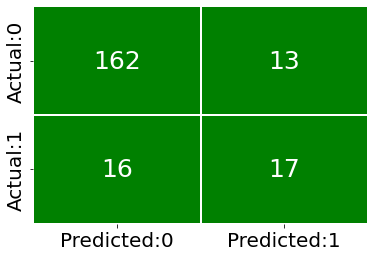

In [35]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['green']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [36]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

**Compute various performance metrics.**

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [37]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.5666666666666667

**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [38]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.5151515151515151

**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [39]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.9257142857142857

**f1-score:** It is defined as the harmonic mean of precision and recall.

In [40]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.5396825396825397

**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [41]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.8605769230769231

In [42]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       175
         1.0       0.57      0.52      0.54        33

    accuracy                           0.86       208
   macro avg       0.74      0.72      0.73       208
weighted avg       0.86      0.86      0.86       208



**Interpretation:** Write inference regarding the accuracy of the logistic regression model.

We can also calculate the above measures using the `classification_report()`

**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [43]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.45774901114706945


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.5) is 0.4696, we can say that there is substantial agreement between the actual and predicted values.

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

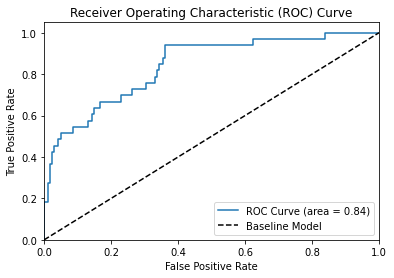

In [44]:
# import required libraries
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# calculate the false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)

# plot the diagonal line representing the baseline model
plt.plot([0, 1], [0, 1], 'k--', label='Baseline Model')

# set the x and y axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# set the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# add the legend
plt.legend(loc="lower right")

# display the plot
plt.show()

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
From the above plot, we can see that our classifier (logistic regression) is away from the dotted line; with the AUC score 0.8473.

<a id="cut_off"></a>
## 3.1 Identify the Best Cut-off Value

In [45]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logistic_regression_model.predict(x_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [46]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logistic_regression_model, value)

In [47]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.786840,0.326316,0.939394,0.682692,0.325538,0.484375
1,0.200000,0.719913,0.338235,0.696970,0.735577,0.307506,0.455446
2,0.300000,0.728745,0.434783,0.606061,0.812500,0.394446,0.506329
3,0.400000,0.709870,0.450000,0.545455,0.822115,0.386480,0.493151
4,0.500000,0.720433,0.566667,0.515152,0.860577,0.457749,0.539683
5,0.600000,0.712987,0.750000,0.454545,0.889423,0.507007,0.566038
6,0.700000,0.642944,0.769231,0.303030,0.875000,0.379104,0.434783
7,0.800000,0.585195,0.750000,0.181818,0.860577,0.246000,0.292683
8,0.900000,0.545455,1.000000,0.090909,0.855769,0.144033,0.166667


<a id="youden"></a>
### 3.1.1 Youden's Index

In [48]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.939394,0.360000,0.102598,0.579394
1,0.878788,0.354286,0.108219,0.524502
2,0.878788,0.360000,0.106266,0.518788
3,0.848485,0.342857,0.127068,0.505628
4,0.666667,0.165714,0.265667,0.500952


We can able to see the Optimal Threshold value is 0.31, Let us consider the same for further computation

#### Plot the confusion matrix, with the optimal threshold computed using Youden's index method.

In [49]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.31 else 1 for x in y_pred_prob]

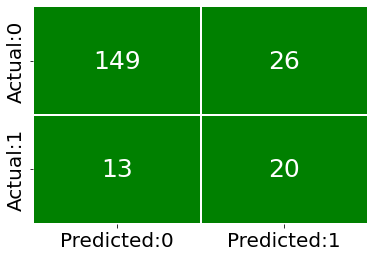

In [50]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['green']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Compute various performance metrics using classification report.**

In [51]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88       175
         1.0       0.43      0.61      0.51        33

    accuracy                           0.81       208
   macro avg       0.68      0.73      0.70       208
weighted avg       0.84      0.81      0.82       208



In [52]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_youden)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.3944461033144223


**Interpretation:** From the above output, write your inference.